#### Bibliotecas utilizadas

In [210]:
import math 
import numpy as np 
from skimage import transform 
from matplotlib import image 
from matplotlib import pyplot as plt 

#### 1 - Retificação Afim - Método das Retas Paralelas 

##### Traçando manualmente dois conjuntos de retas paralelas $l_a$, || $l_b$, e $l_c$ || $l_d$, na imagem img_retificacao.png, encontramos dois pontos de fuga que definem a reta do infinito $l_{\infty}$. 

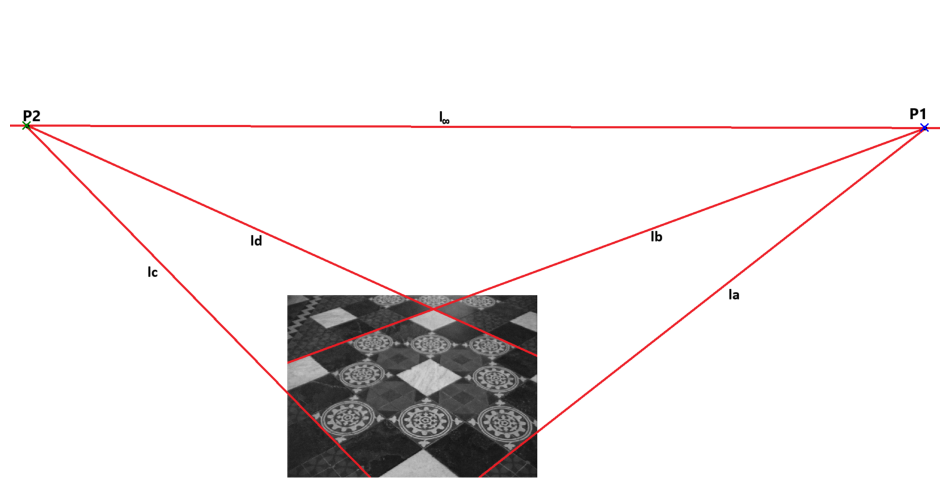

In [214]:
img_tracado = image.imread('Imagens//img_tracado.png')

plt.figure(figsize=(12, 12)) 
plt.plot(2195, 280, marker='x', color="blue") # Ponto de fuga P1 
plt.plot(38, 275, marker='x', color="green")  # Ponto de fuga P2 
plt.imshow(img_tracado) 
plt.axis('off')
plt.show() 

##### Utilizando os eixos definidos na imagem, onde a origem se encontra no canto superior esquerdo com o eixo x crescendo para a direita e o eixo y crescendo para baixo, os pontos de fuga são:
$$ 
\begin{matrix}
      P_1 = (2195,280)  \\
      P_2 = (38,275)
\end{matrix}
$$
##### Representando os pontos de fuga em coordenadas homogêneas e fazendo o seu produto vetorial obtemos a reta que liga os dois pontos(reta do infinito).

In [217]:
x     = [2195,280,1] 
x_lin = [38,275,1] 
l_inf = np.cross(x,x_lin) 
l_inf = l_inf / l_inf[-1]

print("Reta do infinito = ", l_inf) 

Reta do infinito =  [ 8.43191649e-06 -3.63752877e-03  1.00000000e+00]


##### Montando a matriz de transformação H. 

In [220]:
H = np.array([[1,0,0],[0,1,0],l_inf]) 

print(H) 

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 8.43191649e-06 -3.63752877e-03  1.00000000e+00]]


##### Aplicando a transformação 

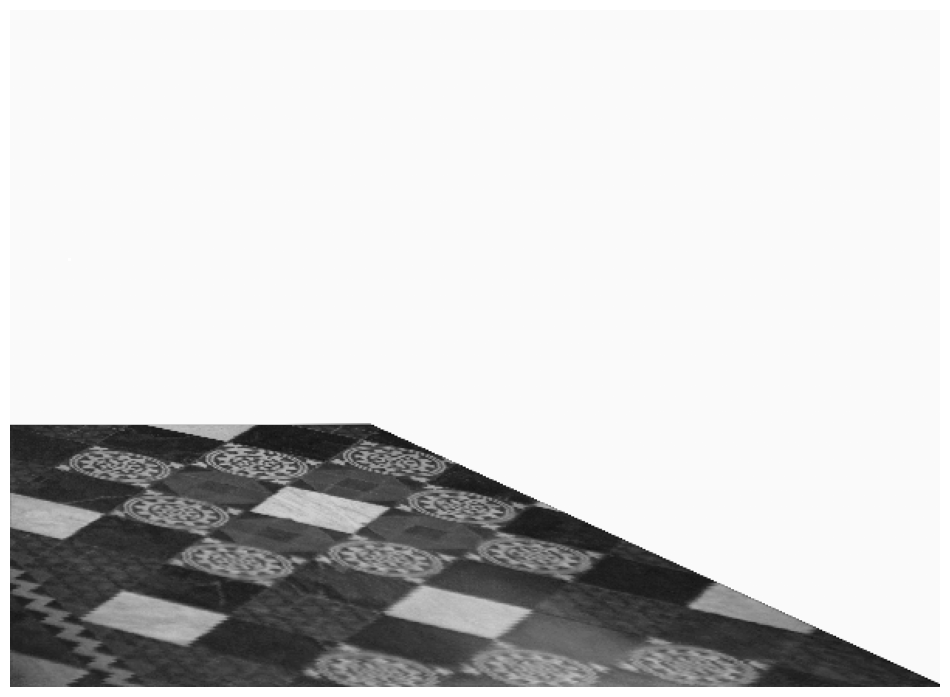

In [223]:
img    = image.imread('Imagens//img_retificacao.png') 
tform  = transform.ProjectiveTransform(matrix=H) 
tf_img = transform.warp(img, tform)

plt.figure(figsize=(12, 12)) 
plt.imshow(tf_img, origin='lower') 
plt.axis('off')
plt.show() 

##### A transformação recuperou o paralelismo entre as linhas removendo as distorções projetivas e deslocando a linha do infinito novamente para o infinito $(0,0, 1)^T$.

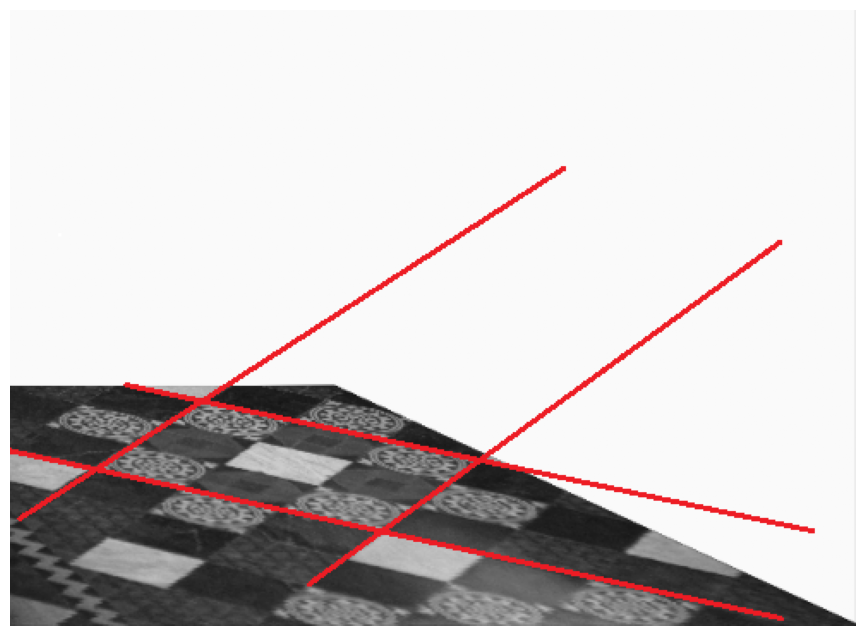

In [226]:
img_ret_afim = image.imread('Imagens//retificação_afim.png') 

plt.figure(figsize=(12, 8)) 
plt.imshow(img_ret_afim) 
plt.axis('off')
plt.show()

#### 2 - Retificação Afim - Método da Razão das Distâncias 

##### Traçando dois conjuntos de pontos colineares (A',B',C') e (a',b’,c’) na imagem.

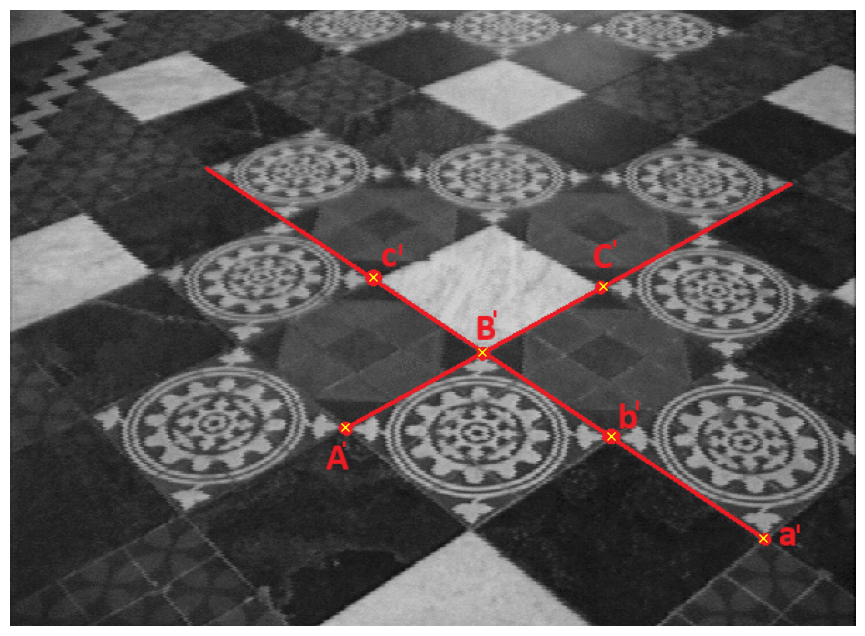

In [230]:
img_tracado2 = image.imread('Imagens//img_tracado2.png')

plt.figure(figsize=(12, 8))

plt.plot(237, 295, marker='x', color="yellow") # Ponto A'
plt.plot(334, 242, marker='x', color="yellow") # Ponto B'
plt.plot(420, 195, marker='x', color="yellow") # Ponto C'

plt.plot(534, 374, marker='x', color="yellow") # Ponto a’ 
plt.plot(426, 302, marker='x', color="yellow") # Ponto b’
plt.plot(257, 189, marker='x', color="yellow") # Ponto c' 

plt.imshow(img_tracado2) 
plt.axis('off')
plt.show() 

##### Calculando as razões das distâncias e os pontos transformados na reta em dimensão um (1D)


##### Primeiro conjunto de pontos 

In [234]:
A = [237, 295]
B = [334, 242]
C = [420, 195]

d1 = math.dist(A, B) 
d2 = math.dist(B, C)

print('Pontos transformados') 
print('A = ', 0) 
print('B = ', d1) 
print('C = ', (d1 + d2))

print("")
r1 = d1/d2 
print('Razão 1 =', r1) 

Pontos transformados
A =  0
B =  110.5350623105628
C =  208.54016421857574

Razão 1 = 1.1278500828896685


##### Assumindo que os azulejos no mundo real sejam quadrados de lado igual a 1, podemos representar os pontos no mundo real e na imagem transformada em coordenadas homogêneas.

##### Montando e resolvendo o sistem para as correspondências entre os pontos na imagem e no mundo real, calculamos a homografia que faz a projeção dos pontos nmo espaço para a imagem.

In [238]:
H = np.array([
             [117.601, 0],
             [0.064, 1]
             ])

print("H: \n",H)

H: 
 [[1.17601e+02 0.00000e+00]
 [6.40000e-02 1.00000e+00]]


##### Transformando o ponto no infinito (1,0) 

In [241]:
p_inf = np.array([1, 0])
p_f = H.dot(p_inf)

xf1 = p_f[0] / p_f[1]
print('Ponto de fuga 1 =', round(xf1))

Ponto de fuga 1 = 1838


##### Segundo conjunto de pontos 

In [244]:
a = [534, 374] 
b = [426, 302]
c = [257, 189]

d3 = math.dist(a, b) 
d4 = math.dist(b, c)

print('Pontos transformados') 
print('a = ', 0) 
print('b = ', d3) 
print('c = ', (d3 + d4))

print("")
r2 = d3/d4 
print('Razão 2 =', r2) 

Pontos transformados
a =  0
b =  129.79984591670362
c =  333.0976570214964

Razão 2 = 0.63847143858227


##### De forma anéloga para o segundo conjunto de pontos, obtemos uma outra matriz de transformação. 

In [247]:
H = np.array([[141.782,0],[0.092,1]]) 

print(H) 

[[1.41782e+02 0.00000e+00]
 [9.20000e-02 1.00000e+00]]


##### Transformando o ponto no infinito (1,0) 

In [250]:
p_inf = np.array([1, 0]) 
pf    = H.dot(p_inf) 
xf2   = p_f[0]/p_f[1]

print('Ponto de fuga 2 = ', round(xf2)) 

Ponto de fuga 2 =  1838


##### Traçando os pontos de fuga e a reta do infinito $l_{\infty}$ na imagem. 

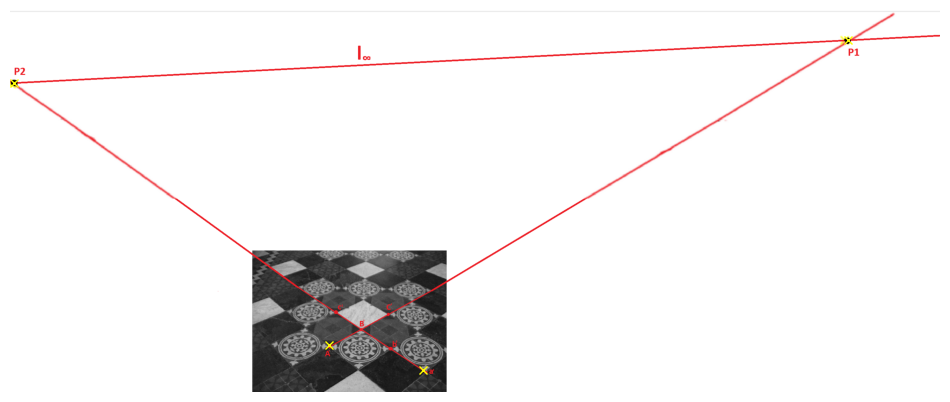

In [253]:
img_tracado = image.imread('Imagens//img_tracado3.png')
                           
plt.figure(figsize=(12, 8))
plt.plot(982, 1035, marker='x', color="yellow")  # Ponto A’
plt.plot(2582, 95, marker='x', color="yellow")   # Ponto de fuga 1(P1)
plt.plot(1273, 1113, marker='x', color="yellow") # Ponto a'
plt.plot(11, 227, marker='x', color="yellow")    # Ponto de fuga 2(P2)

plt.imshow(img_tracado) 
plt.axis('off')
plt.show() 

##### É possível verificar que os pontos de fuga em 1D calculados se aproximam das distâncias das suas posições em 2D em relação aos pontos A’ e a' (Início da reta) 

In [256]:
print('Distância 1(xf1) = ',math.dist([982, 1035], [2562, 95])) 
print('Distância 1(xf2) = ',math.dist([1273, 1113],[10, 230]))

Distância 1(xf1) =  1838.4776310850236
Distância 1(xf2) =  1541.0574291699838


##### Calculo da reta reta do infinito com os pontos de fuga em coordenadas homogêneas. 

In [261]:
x      = np.array([2562, 95, 1])
x_lin  = np.array([10, 230, 1]) 
l_inf2 = np.cross(x,x_lin) 
l_inf2 = l_inf2 / l_inf2[-1]

print('Linha do infinito = ',l_inf2) 

Linha do infinito =  [-2.29470857e-04 -4.33784909e-03  1.00000000e+00]


##### Montando a matriz de transformação.

In [264]:
H = np.array([[1,0,0],[0,1,0],l_inf2]) 
print(H) 

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-2.29470857e-04 -4.33784909e-03  1.00000000e+00]]


##### Aplicando a transformação 

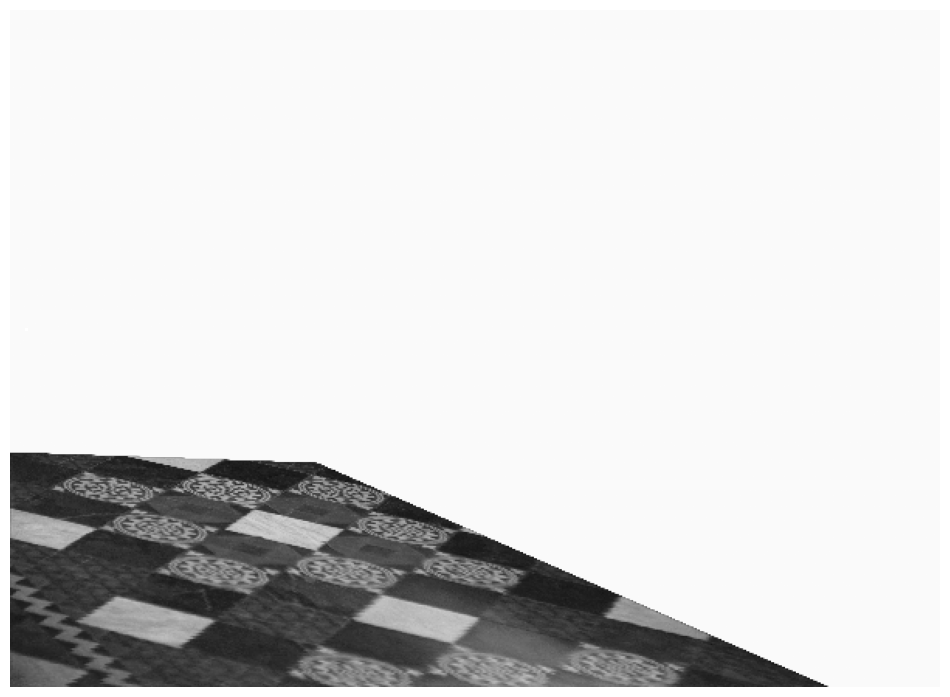

In [267]:
img    = image.imread('Imagens//img_retificacao.png') 
tform  = transform.ProjectiveTransform(matrix=H) 
tf_img = transform.warp(img, tform)

plt.figure(figsize=(12, 12)) 
plt.imshow(tf_img, origin='lower') 
plt.axis('off')
plt.show() 

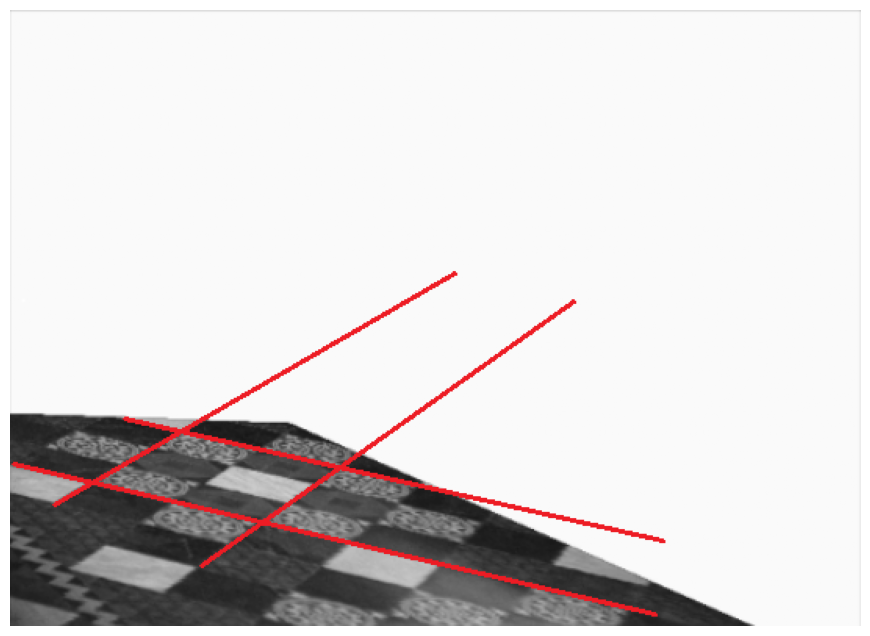

In [269]:
img_ret_afim = image.imread('Imagens//retificação_afim2.png') 

plt.figure(figsize=(12, 8)) 
plt.imshow(img_ret_afim) 
plt.axis('off')
plt.show()

##### Cabe mencionar que nos dois métodos os pontos de fuga foram ajustados na imagem manualmente, isto introduz erros na posição que aliado a erros numéricos causados por arredondamentos, resultaram em retas não perfeitamente paralelas

#### 3 - Retificação Métrica - Método da Cônica Dual dos Pontos Circulares 

##### Calculo da transformacao afim
##### Partindo da imagem com a retificação afim obtida pelo Método das Retas Paralelas, escolhemos os pares (l1,m1), (l2,m2) de retas que são ortogonais no mundo real.

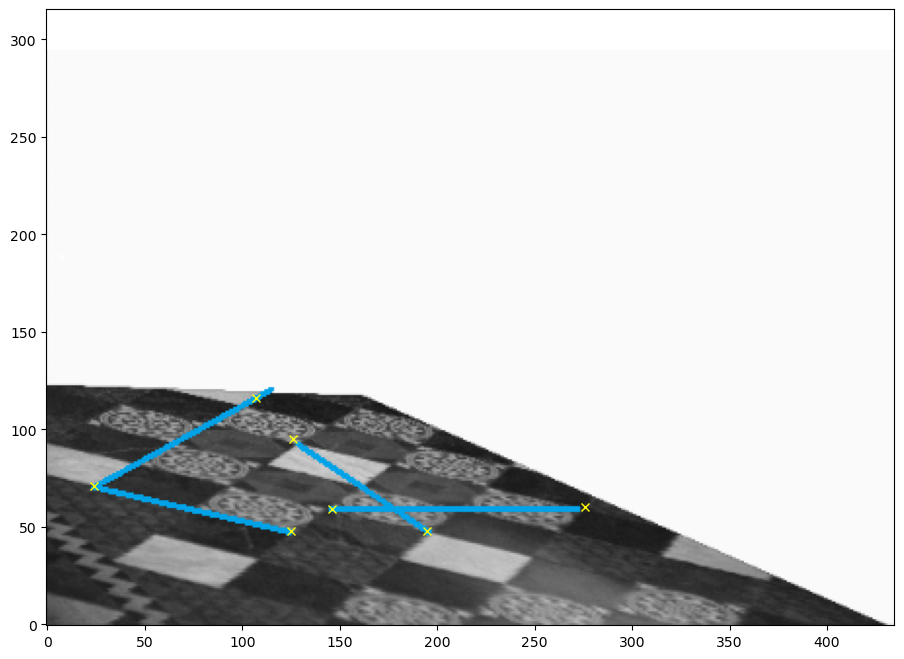

In [287]:
img_ret_afim = image.imread('Imagens//img_tracado4.png')

plt.figure(figsize=(12, 8))
plt.plot(24, 71, marker='x',  color="yellow") 
plt.plot(107, 116, marker='x', color="yellow")

plt.plot(125, 48, marker='x', color="yellow")

plt.plot(195, 48, marker='x', color="yellow")
plt.plot(126, 95, marker='x', color="yellow")

plt.plot(146, 59, marker='x', color="yellow")
plt.plot(276, 60, marker='x', color="yellow")

plt.imshow(img_ret_afim, origin='lower')
plt.show() 

##### Obtendo os coefientes das retas, a partir das coordenadas homogêneas dos pontos escolhidos. 

In [293]:
l1 = np.cross([24, 71,1],[107, 116,1])
l1 = l1 / l1[2]
l2 = np.cross([195, 48,1],[126, 95,1]) 
l2 = l2 / l2[2]

m1 = np.cross([24, 71,1],[125, 48,1]) 
m1 = m1 / m1[2]
m2 = np.cross([146, 59,1],[270, 60,1]) 
m2 = m2 / m2[2]

print() 
print('l1 = ', l1) 
print()
print('l2 = ', l2) 
print() 
print('m1 = ', m1) 
print()
print('m2 = ', m2) 
print()

print('Conjunto 1') 
print('l1*ml = ', l1[0]*m1[0]) 
print('l1*m2 = ', l1[0]*m1[1]) 
print('l2*ml = ', l1[1]*m1[0]) 
print('l2*m2 = ', l1[1]*m1[1]) 
print()

print('Conjunto 2') 
print('l1*m1 = ', l2[0]*m2[0]) 
print('l1*m2 = ', l2[0]*m2[1]) 
print('l2*m1 = ', l2[1]*m2[0]) 
print('l2*m2 = ', l2[1]*m2[1]) 


l1 =  [ 0.00934968 -0.01724496  1.        ]

l2 =  [-0.00376693 -0.00553018  1.        ]

m1 =  [-0.00297812 -0.01307782  1.        ]

m2 =  [ 1.39470014e-04 -1.72942817e-02  1.00000000e+00]

Conjunto 1
l1*ml =  -2.7844437780312445e-05
l1*m2 =  -0.00012227340068745902
l2*ml =  5.135751857257628e-05
l2*m2 =  0.00022552649460131323

Conjunto 2
l1*m1 =  -5.253739404912291e-07
l1*m2 =  6.51463686209124e-05
l2*m1 =  -7.712936573169108e-07
l2*m2 =  9.564041350729694e-05


##### Resolvendo o sistema formado pelas equações (16) com as 4 retas escolhidas obtemos a matriz S 

In [298]:
S = np.array([[11.6413532054, -1.3906678936],[-1.3906678936,1]]) 
print('S:\n',S) 

S:
 [[11.64135321 -1.39066789]
 [-1.39066789  1.        ]]


##### Fazendo a fatoração do Cholesky na matriz S obtemos a matriz K

In [305]:
K = np.linalg.cholesky(S)
print('K:\n',K) 

K:
 [[ 3.41194273  0.        ]
 [-0.40758829  0.91316581]]


##### Deste modo a transformação afim H , a menos de uma translação pode ser expressa como:

In [322]:
Ha = np.hstack((K,np.zeros([2,1])))
Ha = np.vstack((Ha,[0,0,1]))

print('Ha:\n',Ha)

Ha:
 [[ 3.41194273  0.          0.        ]
 [-0.40758829  0.91316581  0.        ]
 [ 0.          0.          1.        ]]


##### Aplicando todas as transformações na imagem original 

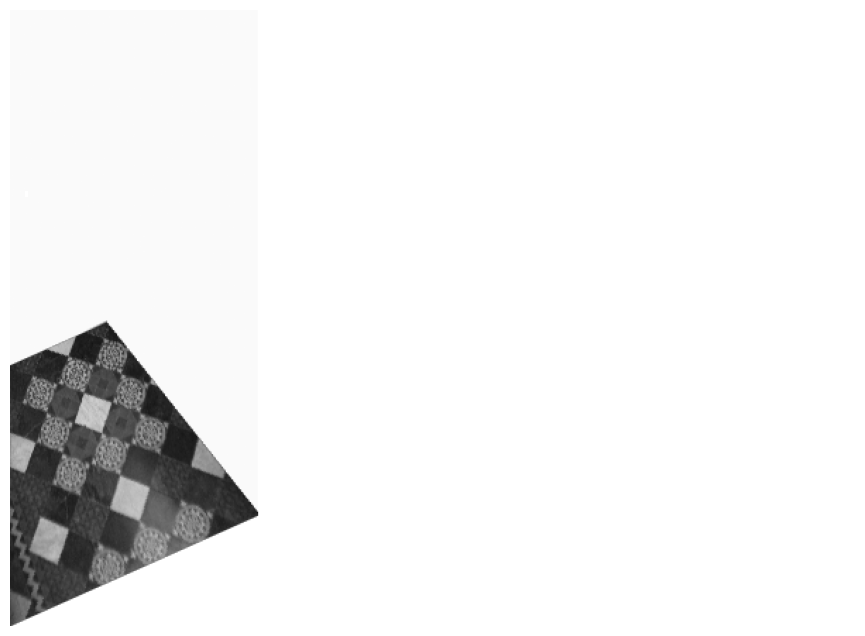

In [329]:
img = image.imread('Imagens//img_retificacao.png') 
H   = np.array([[1,0,0],[0,1,0],l_inf])

plt.figure(figsize=(12, 8))

# Retificacdo Afim
tform  = transform.ProjectiveTransform(matrix=H) 
tf_img = transform.warp(img, tform)

# Retificacdo Métrica 
tform  = transform.ProjectiveTransform(matrix=Ha) 
tf_img = transform.warp(tf_img, tform)

plt.imshow(tf_img, origin='lower') 
plt.axis('off')
plt.show() 

##### Destacando o contorno dos azulejos na imagem com a retificação métrica, vemos que as informações métricas foram recuperadas e os azulejos apresentaram um formato semelhante ao mundo real, salvo erros de ajuste das retas e arredondamentos numéricos.

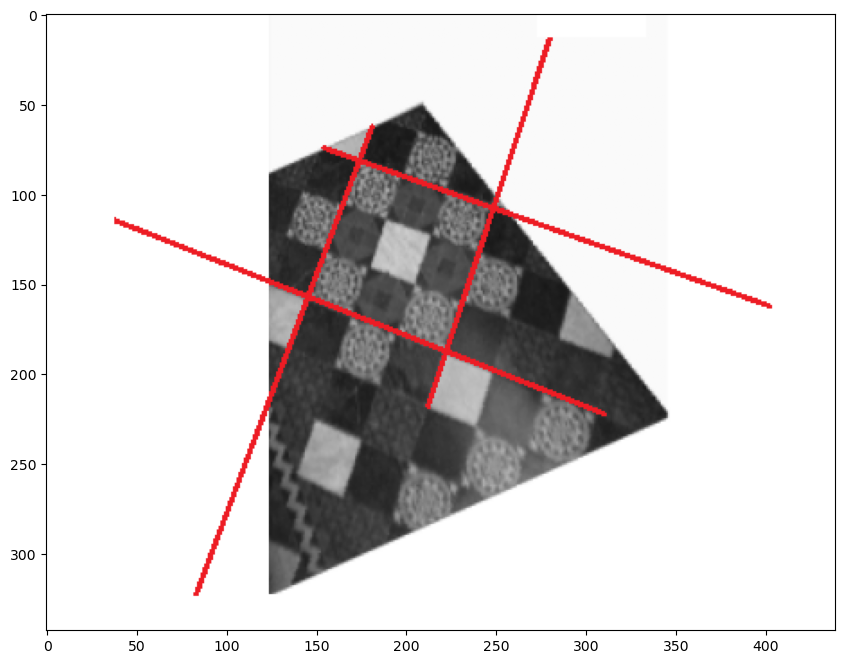

In [334]:
img_ret_afim = image.imread('Imagens//retificação_metrica.png')

plt.figure(figsize=(12, 8)) 
plt.imshow(img_ret_afim) 
plt.show() 

##### Portanto verificamos que os métodos se mostraram eficazes em recuperar as informações afim e métrica da imagem, entretanto com a perda de escala, erros numéricos e arredondamentos a imagem perdeu qualidade, sendo necessário um tratamento adicional para melhores resultados.